In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)



In [61]:
orders = pd.read_csv('data/orders.csv')
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,$4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,$3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,$8.56,2,0.0,$2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,$2.40,1.003,Medium


In [62]:
# Problem 1
p_s = orders.loc[:,['Profit', 'Sales']]

p_s.replace(to_replace='\$', value='', inplace=True, regex=True)
p_s.replace(to_replace='\,', value='', inplace=True, regex=True)

orders['Profit'] = pd.to_numeric(p_s['Profit'])
orders['Sales'] = pd.to_numeric(p_s['Sales'])

orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [63]:
# Problem 2
orders_copy = orders.copy()

orders_copy['Order.Date'] = pd.to_datetime(orders_copy['Order.Date'], infer_datetime_format=True)
orders_copy['Month'] = orders_copy['Order.Date'].dt.month


In [69]:
orders = orders_copy

In [76]:
orders_copy = orders.loc[: , ['Month', 'Product.ID', 'Quantity']]
orders_copy

,Month,Product.ID,Quantity
0,11,TEC-PH-5816,2
1,2,FUR-CH-5379,9
2,10,TEC-PH-5356,9
3,1,TEC-PH-5267,5
4,11,TEC-CO-6011,8
...,...,...,...
51285,6,OFF-FA-3072,5
51286,5,FUR-FU-4070,5
51287,8,OFF-AR-5321,2
51288,2,OFF-BI-2919,2


In [118]:
groups = orders_copy.groupby(['Month']).sum()

In [119]:
groups.reset_index(inplace=True)

In [120]:
groups

,Month,Quantity
0,1,8872
1,2,7429
2,3,10390
3,4,10466
4,5,13196
5,6,18009
6,7,11046
7,8,17596
8,9,20479
9,10,16303


In [ ]:
groups = orders_copy.groupby(['Month', ]).sum()

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

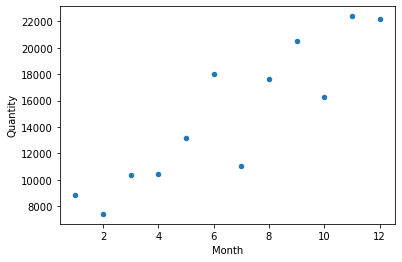

In [122]:
groups.plot(kind='scatter', x='Month', y='Quantity')

In [124]:
orders_copy2 = orders.loc[: , ['Month', 'Category', 'Quantity']]
orders_copy2

,Month,Category,Quantity
0,11,Technology,2
1,2,Furniture,9
2,10,Technology,9
3,1,Technology,5
4,11,Technology,8
...,...,...,...
51285,6,Office Supplies,5
51286,5,Furniture,5
51287,8,Office Supplies,2
51288,2,Office Supplies,2


In [125]:
groups2 = orders_copy2.groupby(['Month', 'Category']).sum()

In [127]:
groups2.reset_index(inplace=True)

In [128]:
groups2

,Month,Category,Quantity
0,1,Furniture,1750
1,1,Office Supplies,5480
2,1,Technology,1642
3,2,Furniture,1494
4,2,Office Supplies,4340
5,2,Technology,1595
6,3,Furniture,2098
7,3,Office Supplies,6283
8,3,Technology,2009
9,4,Furniture,2005


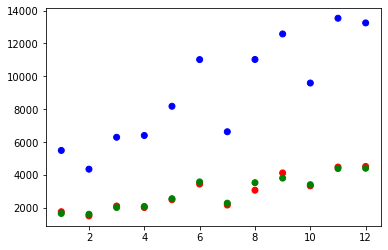

In [131]:
fig, ax = plt.subplots()
colors = {'Furniture':'red', 'Office Supplies':'blue', 'Technology':'green'}

ax.scatter(groups2['Month'], groups2['Quantity'], c=groups2['Category'].apply(lambda x: colors[x]))

plt.show()